<a href="https://colab.research.google.com/github/SETIADEEPANSHU/ExtensiveVisionAIProgramme/blob/master/Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

**Section 1: Importing Libraries**

In [0]:
# Keras is the open-source Neural network library written in Python, It has Tensorflow as backend
# https://keras.io/
!pip install -q keras # Installing through python package manager - pip
import keras # Importing keras

In [0]:

import numpy as np

# Importing Keras Functions
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

**Section 2 : Loading data**

In [0]:
# Loading Data and Doing train/test split for validation of model
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Downloads MNIST data from host server and splits data

In [0]:
??np.shape

(60000, 28, 28)


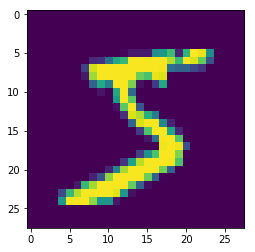

In [8]:
print (X_train.shape) # X_train shape gives us Number of images , height and width of image respectively
from matplotlib import pyplot as plt # Plotting Library in Python
%matplotlib inline # Shows Images embedded in the same Jupyter notebook
plt.imshow(X_train[0]) # Displaying First Image

In [13]:
X_train.shape[0]

60000

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) # Converting into array of (6000,28,28,1) , here 6000 is number of images in training set, 28 -height , 28 - width, 1 indicates channel depth
X_test = X_test.reshape(X_test.shape[0], 28, 28,1) # same for X_test

In [0]:
# Converting pixel values in numbers and normalising them to prevent skewness of data points
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [18]:
y_train[:10] # It gives the 1st 10 labels of the first 10 images , like 5 indicates it is number 5 in image correspondingly

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10) # One-hot-encoding of Y_train
Y_test = np_utils.to_categorical(y_test, 10) # same 

In [21]:
Y_train[:10] # Displaying one-hot encoding for 1st 10 labels


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() # Means sequential block of following components            Input->Conv/MP->Receptive Field (After conv Layer)
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))     28*28*1         3*3
model.add(Convolution2D(64, 3, 3, activation='relu'))                            26*26*32        5*5
model.add(Convolution2D(128, 3, 3, activation='relu'))                           24*24*64        7*7

model.add(MaxPooling2D(pool_size=(2, 2)))                                        22*22*128       14*14

model.add(Convolution2D(256, 3, 3, activation='relu'))                           11*11*128       16*16
model.add(Convolution2D(512, 3, 3, activation='relu'))                           9*9*256         18*18
model.add(Convolution2D(1024, 3, 3, activation='relu'))                          7*7*512         20*20
model.add(Convolution2D(2048, 3, 3, activation='relu'))                          5*5*1024        22*22
model.add(Convolution2D(10, 3, 3, activation='relu'))                            3*3*2048        24*24

model.add(Flatten())                                                             1*1*10
model.add(Activation('softmax'))

model.summary() # Tells about each layer and the parameters associated

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

In [0]:
# Defining the loss function , optimizer for back-prop and result metrics
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
# Trains the model with Training set and batch size of 32 images at once in 10 epochs (1 epoch = all images seen)
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 116s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - a

In [0]:
?? model.evaluate

In [0]:
# Validates the model on testing set using evaluate function
score = model.evaluate(X_test, Y_test, verbose=0) # Returns the loss value & metrics values for the model in test mode

In [26]:
print(score) # prints loss and accuracy

[2.3025851249694824, 0.098]


In [0]:
?? model.predict

In [0]:
y_pred = model.predict(X_test) # Generates output predictions for the input samples

In [28]:
print(y_pred[:9]) # 1st 10 Predictions (One-hot form)
print(y_test[:9]) # 1st 10 Predicted Labels

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


# Ideal Network

In [0]:
1) The number of layers in the network to predict the images of size 28*28 is much more than needed .
   Due to this every layer is almost learning the same things.
   Number of layers = 8
   
2) Most importantly. these many number of channels are not required. As the images have not much complexity

3) Also sudden decrease in channel number from 2048 to 10 makes vital information to lose. Instead could have used 1*1 conv to mix the channels
